In [101]:
import meep as mp
import matplotlib.pyplot as plt

In [102]:
SiO2 = mp.Medium(index=1.45)

In [103]:
cell_size = (0.3,0,0.3)

boundary_layer = [
    mp.PML(0.05, mp.X),
    mp.PML(0.05, mp.Z)
                  ]

In [104]:
lambda_min = 0.4
lambda_max = 0.7
fmin = 1 / lambda_min
fmax = 1 / lambda_max
fcen = 0.5 * (fmin+fmax)
df = fmax - fmin
resolution = 100
nfreq = 25

In [105]:
source_center = mp.Vector3(0,0,0)
sources = [mp.Source(
    src=mp.ContinuousSource(frequency=fcen, fwidth=df),
    component=mp.Ez,
    center=source_center
)]

In [106]:
sim = mp.Simulation(
    cell_size=cell_size,
    default_material=mp.Medium(index=1),
    boundary_layers=boundary_layer,
    sources=sources,
    resolution=resolution
)

In [107]:
# --- Flux 모니터 4면 등록 (tight box 기준) ---
offset = 0.01
flux_size_x = 0.02
flux_size_y = 0.02

# Dipole 위치
source_center = mp.Vector3(0, 0, 0)

# 박스 4면
flux_x1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center - mp.Vector3(offset, 0, 0),
    size=mp.Vector3(0, 0, flux_size_y),
    direction=mp.Z,
    weight=-1
))

flux_x2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center + mp.Vector3(offset, 0, 0),
    size=mp.Vector3(0, 0, flux_size_x),
    direction=mp.Z
))

flux_y1 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center - mp.Vector3(0, 0, offset),
    size=mp.Vector3(flux_size_y, 0),
    direction=mp.Z,
    weight=-1
))

flux_y2 = sim.add_flux(fcen, df, nfreq, mp.FluxRegion(
    center=source_center + mp.Vector3(0, 0, offset),
    size=mp.Vector3(flux_size_y, 0),
    direction=mp.Z
))


In [108]:
sim.run(until=100)

flux_x1_get = mp.get_fluxes(flux_x1)
flux_x2_get = mp.get_fluxes(flux_x2)
flux_y1_get = mp.get_fluxes(flux_y1)
flux_y2_get = mp.get_fluxes(flux_y2)

freqs = mp.get_flux_freqs(flux_x1)

-----------
Initializing structure...
time for choose_chunkdivision = 4.1008e-05 s
Working in 3D dimensions.
Computational cell is 0.3 x 0.01 x 0.3 with resolution 100
time for set_epsilon = 0.00236893 s
-----------
run 0 finished at t = 100.0 (20000 timesteps)


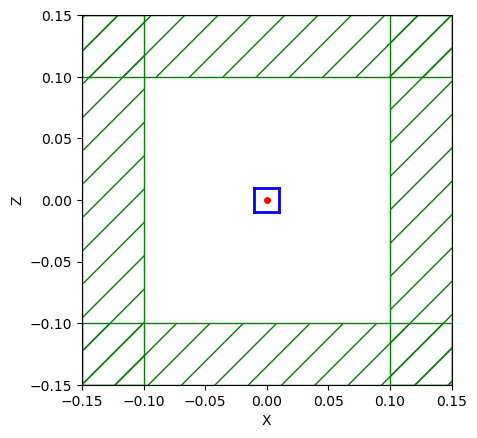

In [109]:
sim.plot2D()
plt.show()

In [110]:
import numpy as np
net_power = np.array(flux_x2_get+flux_x1_get+flux_y2_get+flux_y1_get)
print(net_power)
print(freqs)

[ 6.02274307e-17 -5.37222176e-17 -4.25549353e-17 -2.14672030e-17
  2.36030813e-16  2.62376926e-17  7.30752264e-17  1.82796486e-16
  4.24844621e-16 -2.51534904e-16  1.47001552e-15  5.61876934e-15
 -5.70654635e-14  3.45383444e-15  7.16576321e-16  3.76001313e-15
  7.94286512e-16  1.02457105e-15 -3.94595381e-16 -4.82469967e-16
  4.13352078e-16 -2.19483177e-16  1.81387023e-16 -5.32953130e-17
 -9.78627986e-17 -2.10904428e-16 -2.30508158e-16 -4.59701721e-16
  2.47902827e-16 -6.07153217e-17  1.12757026e-16  5.29958022e-16
 -6.97358837e-16  3.40873163e-16 -4.37150316e-16 -2.04437162e-15
 -1.63914021e-14  2.22044605e-16 -1.24761312e-14  9.40003284e-16
 -1.89952221e-16 -4.79325780e-16 -5.81566045e-16  6.81095805e-16
  7.01370385e-16  1.90819582e-17  1.42653901e-16 -4.24139890e-16
  8.67022925e-17  1.31025833e-16 -9.78512402e-03  6.33724628e-04
 -1.12266991e-02 -3.43747916e-04 -1.19078507e-02 -3.05218436e-03
 -1.16348089e-02 -8.10822513e-03 -1.03177104e-02 -1.47577363e-02
 -7.99104594e-03  6.70409

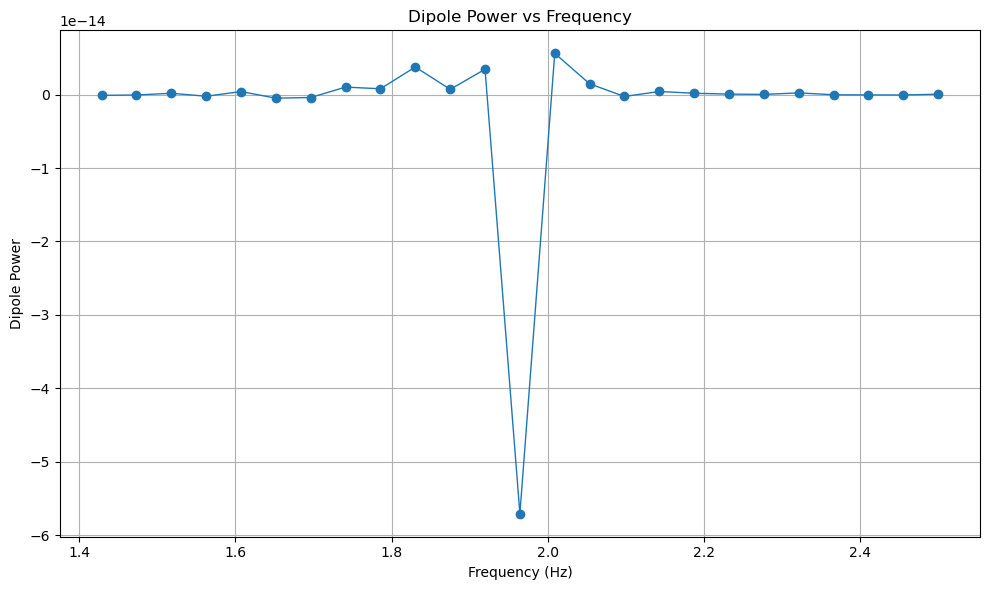

In [111]:
# 데이터 길이 맞추기 (짧은 쪽으로)
min_length = min(len(net_power), len(freqs))
net_power = net_power[:min_length]
freqs = freqs[:min_length]

# Plot 그리기
plt.figure(figsize=(10, 6))
plt.plot(freqs, net_power, marker='o', linestyle='-', linewidth=1)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Dipole Power')
plt.title('Dipole Power vs Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()